<a href="https://colab.research.google.com/github/PranavPhanindra/Deep-Learning-PyTorch/blob/main/23357_MTCS_205P_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
!pip install torchviz
!pip install tensorboard
!pip install pyngrok

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=3d08e8c22cac15c8d888ca6ed174c4ed2f7726f1aeff5280247b24194931c456
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [2]:
import os
import matplotlib.pyplot as plt
import torchvision.models as models
import torch

from pyngrok import ngrok
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchviz import make_dot
from torch.utils.tensorboard import SummaryWriter

# Data Loading and info about Data

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 26421880/26421880 [00:13<00:00, 2021076.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 317855.55it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5581929.25it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13657354.20it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

#Defining labels for different classes of dataset

(-0.5, 27.5, 27.5, -0.5)

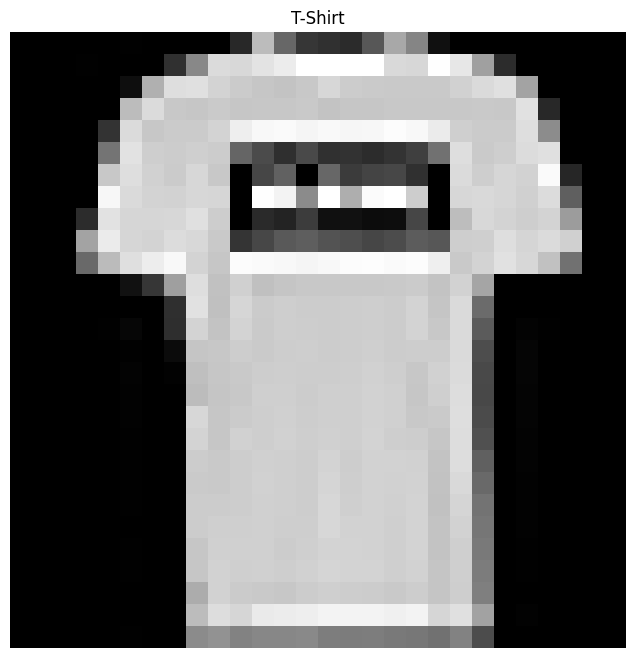

In [5]:
figure = plt.figure(figsize=(8, 8))
img,label = training_data[1]
img = img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(labels_map[label])
plt.axis("off")

In [6]:
img

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686, 0.3412, 0.6588,
         0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922, 0.5333,
         0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000, 1.0000, 0.8510,
         0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706, 0.8784,
         0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000, 0.7922, 0.7882,
         0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843, 0.7765,
         0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765, 0.7765, 0.7843,
         0.7843, 0.7843, 0.7843, 0.7882, 0.7843, 0.8824

# Creating Neural Network Class

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            #Layer 1 - 64 Nodes
            #Layer 2 - 128 Nodes
            #Relu Activation for each layer
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64 , 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
#Can also declare the layers as linear layer 1 etc..
#defining forward function that passes the data on each epoch
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Checking for the devices we have so that we can run the code either on GPU or on CPU

In [8]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [9]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


Here we see how the initialisations are done

In [10]:
"""for params in model.parameters() :
  print(params)"""
print("---------------------------------------------------------------------------------------")
for linParams in model.linear_relu_stack.named_parameters():
  print(linParams)
  print(linParams[1].size())
  print("---------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------
('0.weight', Parameter containing:
tensor([[ 0.0206, -0.0163, -0.0011,  ...,  0.0258,  0.0267,  0.0046],
        [-0.0255,  0.0253, -0.0327,  ..., -0.0347,  0.0035,  0.0335],
        [-0.0249,  0.0063, -0.0182,  ..., -0.0180, -0.0250, -0.0182],
        ...,
        [ 0.0310, -0.0254, -0.0315,  ..., -0.0133, -0.0119,  0.0182],
        [ 0.0208, -0.0012,  0.0195,  ...,  0.0210, -0.0336,  0.0078],
        [-0.0152,  0.0053,  0.0252,  ..., -0.0354, -0.0230, -0.0138]],
       requires_grad=True))
torch.Size([64, 784])
---------------------------------------------------------------------------------------
('0.bias', Parameter containing:
tensor([ 0.0240,  0.0296,  0.0277,  0.0114, -0.0030, -0.0114, -0.0011,  0.0192,
        -0.0353,  0.0254,  0.0174, -0.0239, -0.0140,  0.0212, -0.0289, -0.0159,
         0.0100, -0.0333, -0.0067,  0.0071,  0.0048, -0.0108,  0.0156, -0.0244,
        -0.0197,  0.0206, -0.014

Hyper Parameters

## Train Loop

In [11]:
def train_loop(dataloader,model,lossFn,optimizer1) :

  size = len(dataloader.dataset)
  # Set the model to training mode
  model.train()

  for batch,(X,y) in enumerate(dataloader) :

    #Predictions and loss as we call forward and loss is calculated to be further used
    pred = model(X)
    #make_dot(pred, params=dict(model.named_parameters()))
    loss = lossFn(pred,y)

    #Backpropagation
    #Calculation of Gradient
    loss.backward()
    #This would update the weights and biases
    optimizer1.step()
    #This would zero down the gradients so that they arent added up in next step
    optimizer1.zero_grad()

    if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [12]:
def test_loop(dataloader, model, loss_fn):
    #Set model in evaluation mode
    model.eval()

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    #Mean or average of loss
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return 100*correct

In [13]:
learningRate = 1e-1
batchSize  = 128
epochs = 20

In [14]:
train_dataloader = DataLoader(training_data, batch_size=batchSize,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batchSize,shuffle=True)

In [15]:
#Combines LogSoftmax and NLLLoss - Negativce log likelihood
lossFn = nn.CrossEntropyLoss()
optimizer1 = torch.optim.SGD(model.parameters(),lr = learningRate)

In [17]:
maxAccuracy = 0.0
modelPath = "/content/drive/MyDrive/Colab Notebooks/MTCS-205/Assignments/Assignment-1-Model/maxAccuracyModel.pth"

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, lossFn, optimizer1)
    #test_loop(test_dataloader, model, lossFn)
    accuracy = test_loop(test_dataloader, model, lossFn)
    if accuracy > maxAccuracy :
      maxAccuracy = accuracy
      torch.save(model.state_dict(), modelPath)
      print(f"Model saved with accuracy: {maxAccuracy:.2f}%")

print("Done!")

Epoch 1
-------------------------------
loss: 0.605356  [  128/60000]
loss: 0.555008  [12928/60000]
loss: 0.415822  [25728/60000]
loss: 0.444401  [38528/60000]
loss: 0.516280  [51328/60000]
Test Error: 
 Accuracy: 82.4%, Avg loss: 0.485648 

Model saved with accuracy: 82.41%
Epoch 2
-------------------------------
loss: 0.365725  [  128/60000]
loss: 0.381182  [12928/60000]
loss: 0.416659  [25728/60000]
loss: 0.366070  [38528/60000]
loss: 0.525844  [51328/60000]
Test Error: 
 Accuracy: 83.5%, Avg loss: 0.451012 

Model saved with accuracy: 83.52%
Epoch 3
-------------------------------
loss: 0.467451  [  128/60000]
loss: 0.429962  [12928/60000]
loss: 0.433258  [25728/60000]
loss: 0.402911  [38528/60000]
loss: 0.385085  [51328/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.411682 

Model saved with accuracy: 84.97%
Epoch 4
-------------------------------
loss: 0.458657  [  128/60000]
loss: 0.380005  [12928/60000]
loss: 0.377647  [25728/60000]
loss: 0.359906  [38528/60000]
loss: 0.3005

Visualisations in Tensorboard

In [ ]:
"""logsPath = "/content/drive/MyDrive/Colab Notebooks/MTCS-205/Assignments/logs"
writer = SummaryWriter(logsPath)"""